In [1]:
import sys
sys.path.append('../')

In [2]:
from scripts.utils import data_path, set_mpl
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from astropy.table import Table
%matplotlib inline


# Nway run in distnce-only mode + autocalibration

In [3]:
''' 
cd /Users/sdbykov/work/lockman_hole/0_data/`


nway.py ERO_lhpv_03_23_sd01_a15_g14.fits :pos_err desi_lh.fits 0.1 --out=nway/nway_predef_cal_mag_auto.fits --radius 20 --mag DESI:nnprior ../1_csc-desi-photo-prior/model/nn-prior.csv --mag DESI:mag_g auto  --mag DESI:mag_r auto --mag DESI:mag_z auto  --mag-radius 3;


nway.py ERO_lhpv_03_23_sd01_a15_g14_random.fits :pos_err desi_lh.fits 0.1 --out=nway/nway_predef_cal_mag_auto_random.fits --radius 20 --mag DESI:nnprior ../1_csc-desi-photo-prior/model/nn-prior.csv --mag DESI:mag_g auto  --mag DESI:mag_r auto --mag DESI:mag_z auto  --mag-radius 3;


nway-calibrate-cutoff.py nway/nway_predef_cal_mag_auto.fits nway/nway_predef_cal_mag_auto_random.fits


For a false detection rate of <1%
--> use only counterparts with p_any>0.93 (0.61% of matches)

For a false detection rate of <3%
--> use only counterparts with p_any>0.85 (0.67% of matches)

For a false detection rate of <5%
--> use only counterparts with p_any>0.79 (0.70% of matches)

For a false detection rate of <10%
--> use only counterparts with p_any>0.67 (0.74% of matches)

'''

' \ncd /Users/sdbykov/work/lockman_hole/0_data/`\n\n\nnway.py ERO_lhpv_03_23_sd01_a15_g14.fits :pos_err desi_lh.fits 0.1 --out=nway/nway_predef_cal_mag_auto.fits --radius 20 --mag DESI:nnprior ../1_csc-desi-photo-prior/model/nn-prior.csv --mag DESI: mag_g auto auto --mag-radius 3 --mag DESI: mag_r auto auto --mag-radius 3 --mag DESI: mag_z auto auto --mag-radius 3 ;\nnway.py ERO_lhpv_03_23_sd01_a15_g14_random.fits :pos_err desi_lh.fits 0.1 --out=nway/nway_predef_cal_mag_auto_random.fits --radius 20 --mag DESI:nnprior ../1_csc-desi-photo-prior/model/nn-prior.csv --mag DESI: mag_g auto auto --mag-radius 3 --mag DESI: mag_r auto auto --mag-radius 3 --mag DESI: mag_z auto auto --mag-radius 3 ;\n\n\nnway-calibrate-cutoff.py nway/nway_predef_cal_mag_auto.fits nway/nway_predef_cal_mag_auto_random.fits\n\n\n'

In [4]:
dat = Table.read(data_path+'nway/nway_predef_cal_mag_auto.fits', format='fits')
matches = dat.to_pandas()
matches.sort_values(by=['EROSITA_ID', 'p_i' ], inplace=True, ascending=[True, False])
matches.head(5)

,EROSITA_ID,EROSITA_RA,EROSITA_DEC,EROSITA_pos_err,EROSITA_ML_FLUX_0,DESI_desi_id,DESI_ra,DESI_dec,DESI_mag_g,DESI_mag_r,...,dist_bayesfactor,dist_post,bias_DESI_nnprior,bias_DESI_mag_g,bias_DESI_mag_r,bias_DESI_mag_z,p_single,p_any,p_i,match_flag
13707,b'SRGe J101903.3+563020',154.763934,56.505585,5.001804,2.171120e-14,b'9011_606779_231',154.762154,56.504538,21.087423,20.774010,...,9.299730,0.454734,42.866749,4.236516,2.935070,2.302500,0.999024,0.999024,0.999783,1
13712,b'SRGe J101903.3+563020',154.763934,56.505585,5.001804,2.171120e-14,b'9011_606779_263',154.767108,56.505610,25.208895,24.323198,...,9.186378,0.391131,3.096379,0.432552,0.375934,0.420679,0.119770,0.999024,0.000133,0
13710,b'SRGe J101903.3+563020',154.763934,56.505585,5.001804,2.171120e-14,b'9011_606779_229',154.761950,56.509082,23.785849,23.093630,...,8.021732,0.042118,5.209694,0.403097,0.483581,0.660311,0.028640,0.999024,0.000029,0
13708,b'SRGe J101903.3+563020',154.763934,56.505585,5.001804,2.171120e-14,b'9011_606779_239',154.763287,56.506903,23.636383,22.371996,...,9.321630,0.467263,0.040286,0.521092,0.814561,1.941597,0.028297,0.999024,0.000028,0
13715,b'SRGe J101903.3+563020',154.763934,56.505585,5.001804,2.171120e-14,b'9011_606779_286',154.769831,56.507923,NaN,23.080505,...,7.726255,0.021783,2.050834,1.000000,0.483581,1.110987,0.023947,0.999024,0.000024,0


In [5]:
dat = Table.read(data_path+'nway/nway_predef_cal_mag_auto_random.fits', format='fits')
matches_rand = dat.to_pandas()
matches_rand.sort_values(by=['EROSITA_ID', 'p_i' ], inplace=True, ascending=[True, False])
matches_rand.head(5)

,EROSITA_ID,EROSITA_RA,EROSITA_DEC,EROSITA_pos_err,EROSITA_ML_FLUX_0,DESI_desi_id,DESI_ra,DESI_dec,DESI_mag_g,DESI_mag_r,...,dist_bayesfactor,dist_post,bias_DESI_nnprior,bias_DESI_mag_g,bias_DESI_mag_r,bias_DESI_mag_z,p_single,p_any,p_i,match_flag
10468,b'SRGe J101903.3+563020',154.788895,56.49546,5.001804,2.171120e-14,b'9011_606779_398',154.789385,56.497124,23.867940,23.635174,...,9.212102,0.405324,1.418587,0.979082,1.047364,1.082516,0.517681,0.541374,0.909261,1
10471,b'SRGe J101903.3+563020',154.788895,56.49546,5.001804,2.171120e-14,b'9011_606779_426',154.793393,56.497386,23.982150,23.206541,...,8.421648,0.099444,0.783855,1.010973,0.937385,1.158110,0.086756,0.541374,0.080477,0
10472,b'SRGe J101903.3+563020',154.788895,56.49546,5.001804,2.171120e-14,b'9011_606779_436',154.795591,56.497017,25.877258,24.937063,...,7.722952,0.021621,0.350509,1.049139,0.919422,1.068924,0.007923,0.541374,0.006766,0
10467,b'SRGe J101903.3+563020',154.788895,56.49546,5.001804,2.171120e-14,b'9011_606779_449',154.797859,56.497796,22.368656,21.659575,...,6.165533,0.000612,6.776903,0.845963,1.001846,0.949334,0.003327,0.541374,0.002828,0
10469,b'SRGe J101903.3+563020',154.788895,56.49546,5.001804,2.171120e-14,b'9011_606779_381',154.786876,56.491487,23.870918,22.769096,...,7.616427,0.016998,0.040286,0.979082,0.918366,1.123482,0.000703,0.541374,0.000596,0


In [6]:
matches.p_any.quantile(1-0.33)

0.9979616403579712

<AxesSubplot:>

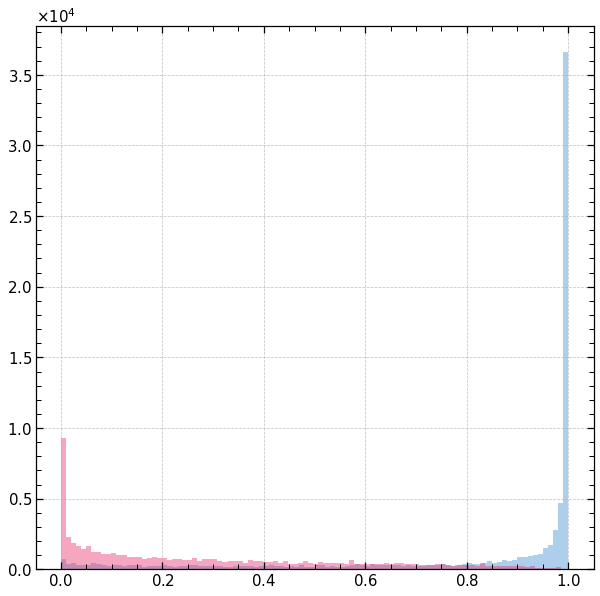

In [7]:
plt.figure(figsize=(10,10))
matches.p_any.hist(bins=100, alpha = 0.4)
matches_rand.p_any.hist(bins=100, alpha = 0.4)

<Figure size 720x720 with 0 Axes>

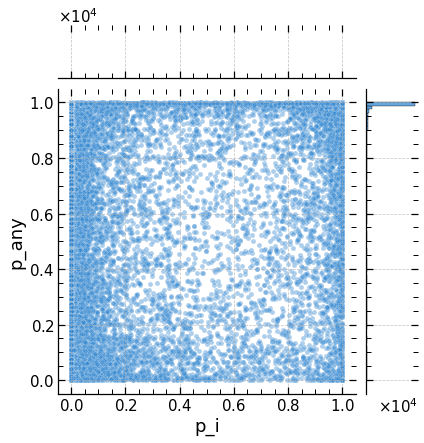

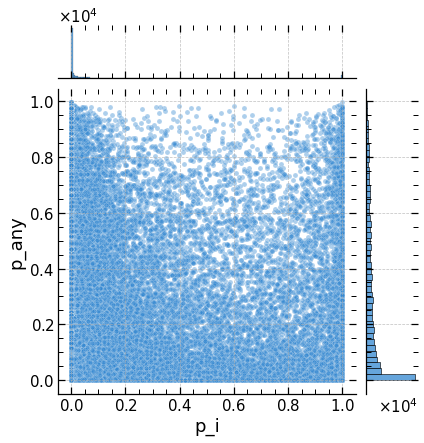

In [8]:
plt.figure(figsize=(10,10))
sns.jointplot(x = matches.p_i, y = matches.p_any, alpha = 0.4)
sns.jointplot(x = matches_rand.p_i, y = matches_rand.p_any, alpha = 0.4)

Text(0, 0.5, 'p_any')

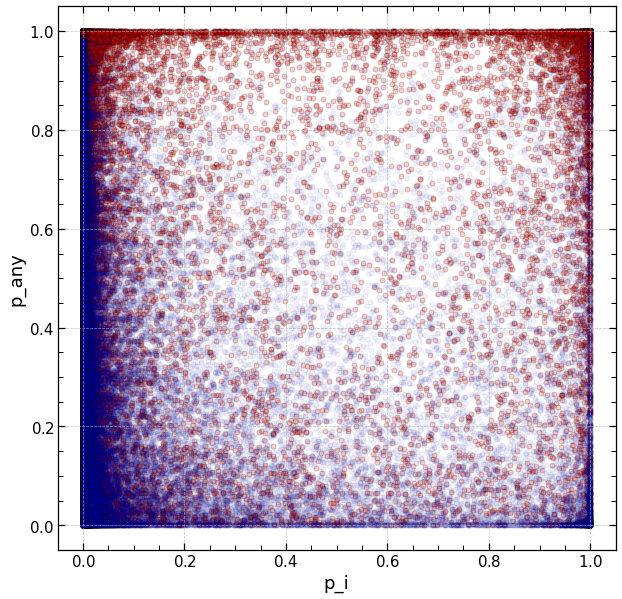

In [9]:
plt.figure(figsize=(10,10))
plt.scatter(matches.p_i, matches.p_any, alpha = 0.2, c = 'red')
plt.scatter(matches_rand.p_i, matches_rand.p_any, alpha = 0.05, c = 'blue')
plt.xlabel('p_i')
plt.ylabel('p_any')